In [1]:
# Package imports
#basics
import numpy as np
import pandas as pd
import string
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

import json
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /Users/yumin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Read data

In [2]:
#business = pd.read_json('/Users/yumin/Desktop/Winter2024/421/Project/Data/yelp_academic_dataset_business.json', lines=True)

In [3]:
# Read business data
business_file = open("/Users/yumin/Desktop/Winter2024/421/Project/Data/yelp_academic_dataset_business.json")
business = []
for line in business_file:
    business.append(json.loads(line))
business = pd.DataFrame(business)
business_file.close()

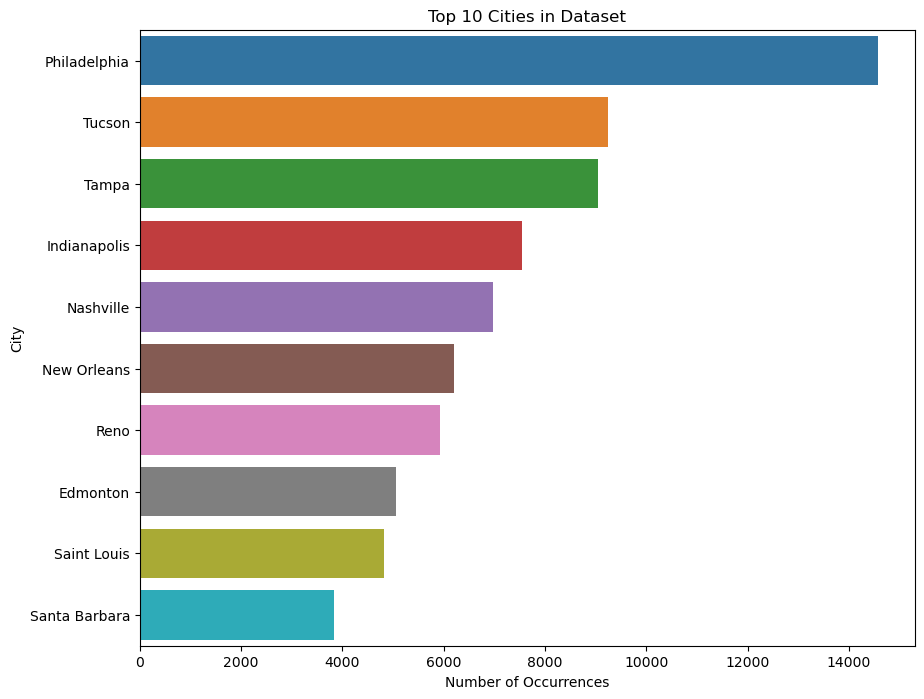

In [4]:
## Find top 10 cities with ratings
city_counts = business['city'].value_counts()

# Show only the top 10 cities
top_n = 10  # Adjust to show top 10 cities
top_cities = city_counts.head(top_n)

# Plot the distribution of the top 10 cities
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.barplot(x=top_cities, y=top_cities.index)  # This creates a horizontal bar plot

# Adding titles and labels for clarity
plt.title('Top 10 Cities in Dataset')
plt.xlabel('Number of Occurrences')
plt.ylabel('City')

# Show the plot
plt.show()

Phily has the most ratings.

In [5]:
# Extract business_id in Phily
json_file_path = '/Users/yumin/Desktop/Winter2024/421/Project/Data/yelp_academic_dataset_business.json'

business_id_list = []
#city_list = []
# Open the file in read mode
with open(json_file_path, 'r') as file:
    # Iterate over each line in the file
    for line in tqdm(file):
        # Parse the JSON data from each line
        data = json.loads(line)
        
        # Now, you can work with `data` which is a Python dictionary or list
        city = data['city'].strip().lower()
        if city == 'philadelphia':
            business_id_list.append(data['business_id'])
        
business_id_list

150346it [00:00, 238310.08it/s]


['MTSW4McQd7CbVtyjqoe9mw',
 'MUTTqe8uqyMdBl186RmNeA',
 'ROeacJQwBeh05Rqg7F6TCg',
 'QdN72BWoyFypdGJhhI5r7g',
 'Mjboz24M9NlBeiOJKLEd_Q',
 'aPNXGTDkf-4bjhyMBQxqpQ',
 '-4dYswJy7SPcbcERvitmIg',
 'ppFCk9aQkM338Rgwpl2F5A',
 'eMjnw_7wp-CscyNh6Lu0ZA',
 'xfmkEGiIERBaBMLhw-dTCg',
 'iPSPcprSnkLOuL1Ns8UZZA',
 '3BJxm-HnvzdwD1zjmSbmyQ',
 'GWGXTKR0Fhdvzf_isDqJug',
 '-aeZuatjCDMV1X4gCTz9Ug',
 'h-y5azB-VlQAT3m7Ff2g2Q',
 'WYYdQDjx-DsCanlP0DpImQ',
 '07JLsUInZr5OSiYH2XVi4g',
 'FTFtoylMzkrzqNVSl-bkKw',
 'O1oZpbZNDMH_gz8DhsZCdA',
 '2dlQX5sP9X6Dlm1MmNOlSw',
 'ONUZertKOOImiyQG66Z7Tg',
 'bTve2mwLk5Zc01vRKqc2KQ',
 'D9Xez9uOSM4DgSjSTywq7w',
 'MyE_zdul_JO-dOHOug4GQQ',
 'bqmX882_6AxVA_uHEQ70sQ',
 'jL_NufxqXi-BpW5uXKsPwQ',
 'Tm3QiAVLJAR2fEJK7APPPQ',
 'n8ecak12IF_jhnPNs37AZA',
 '_T0cPZE2ZJOTTlYYKMP64Q',
 'VbItL6RDULtnw4YvB6EhVg',
 '6bFx8j2KqPfmT0XEUS1RMg',
 'G2Byuh4EVeSnqqWBWtD7rg',
 'usv5G5cO314pPHRTGq2Eyw',
 '6I_DA3uqOox50rBvjrQ_-g',
 'e8pMCk4bE0U4qk7z59Lxkg',
 'IAj1Lw3FAOY-yZn4IO7ElQ',
 'aNLr1j_3CZ46rqiUeLaQ-A',
 

In [6]:
review_json_file_path = '/Users/yumin/Desktop/Winter2024/421/Project/Data/yelp_academic_dataset_review.json'

In [7]:
# Filter Review json file to only contain business_id in Phily
review_phily = []

with open(review_json_file_path, 'r') as file:
    # Iterate over each line in the file
    for line in tqdm(file):
        # Parse the JSON data from each line
        review = json.loads(line)
        
        # Now, you can work with `data` which is a Python dictionary or list
        if review['business_id'] in business_id_list:
            review_phily.append(review)
            if len(review_phily) >= 10000:
                break
        
review_phily = pd.DataFrame(review_phily)
review_phily

58614it [00:04, 12688.17it/s]


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
3,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14
4,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5.0,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25
...,...,...,...,...,...,...,...,...,...
9995,OBLJXmWiodkgC4L7k8U9hA,9pj8GGO_d83EQvf5GWJcIQ,7mpYTDb24SywNMRn3yeakQ,3.0,0,0,0,I had dinner here last night with my family. W...,2014-10-30 21:50:23
9996,sDJhX6civc0v-6znsTkgbw,prpyhhJBEsCnvFGQl6H8aw,LnZvGYbqozanOSevcftnrw,4.0,0,0,0,For some reason I was on a recent burrito/ any...,2013-11-17 20:39:46
9997,MgPj_tcktIiVuPsNyVoLOw,XQIah0kkExdDVFSRGRfR6Q,jsUzVBGEIoer6l_fxbad2A,1.0,14,1,0,I will not use them again. My cleaner cancell...,2014-02-28 13:01:30
9998,QDy4gBrTT4MBtHmPiWGmtQ,rnbJGCSjeTwML9Qn3Lk1SQ,qluIWCzDpeZfddykm_2gYg,1.0,5,8,0,My father and I were attending a legal seminar...,2011-04-26 14:56:29


In [8]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [9]:
# # Extract user_id from review_phily
# user_id_list = review_phily['user_id'].tolist()

In [10]:
# user_json_file_path = '/Users/yumin/Desktop/Winter2024/421/Project/Data/yelp_academic_dataset_user.json'

In [11]:
# # Filter User json file to only contain user_id in Phily
# user_phily = []

# with open(user_json_file_path, 'r') as file:
#     # Iterate over each line in the file
#     for line in tqdm(file):
#         # Parse the JSON data from each line
#         user = json.loads(line)
        
#         # Now, you can work with `data` which is a Python dictionary or list
#         if user['user_id'] in user_id_list:
#             user_phily.append(user)
        
# user_phily = pd.DataFrame(user_phily)
# user_phily

In [12]:
# Merge business and review
df = pd.merge(business, review_phily, on='business_id', how='inner')
# Only work with restaurants
df = df[df['categories'].str.contains('Restaurants')]
# Rename stars_x, and stars_y
df = df.rename(columns={'stars_x': 'business_star', 'stars_y': 'review_star'})

### EDA

In [13]:
# Missing data 

missing_value_count= df.isnull().sum()
missing_value_count

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
business_star      0
review_count       0
is_open            0
attributes         0
categories         0
hours            325
review_id          0
user_id            0
review_star        0
useful             0
funny              0
cool               0
text               0
date               0
dtype: int64

In [14]:
# Descriptive Statistics
df.describe()

,latitude,longitude,business_star,review_count,is_open,review_star,useful,funny,cool
count,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000,7389.000000
mean,39.960327,-75.161795,3.776627,451.922588,0.637975,3.826905,0.840980,0.288537,0.395994
std,0.032098,0.033920,0.530292,374.818213,0.480618,1.261418,1.675089,1.037392,1.110522
min,39.876814,-75.249793,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,39.946795,-75.173768,3.500000,163.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,39.951290,-75.163396,4.000000,339.000000,1.000000,4.000000,0.000000,0.000000,0.000000
75%,39.960915,-75.149510,4.000000,618.000000,1.000000,5.000000,1.000000,0.000000,0.000000
max,40.141488,-74.965011,5.000000,1553.000000,1.000000,5.000000,34.000000,23.000000,22.000000


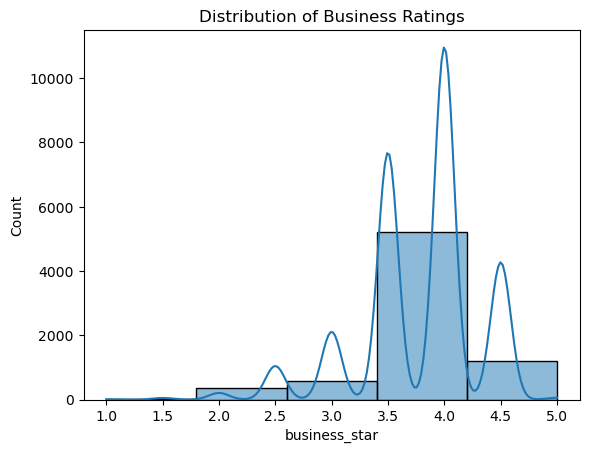

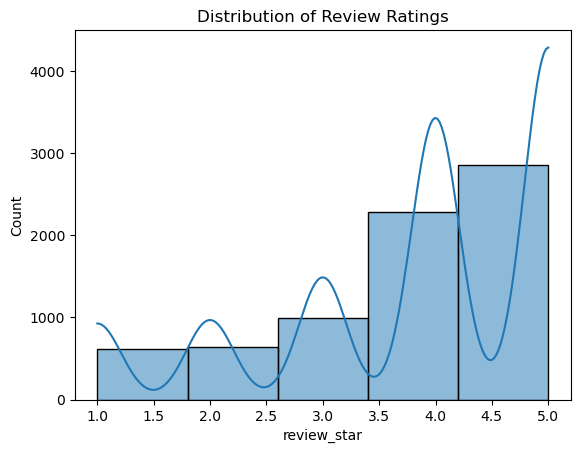

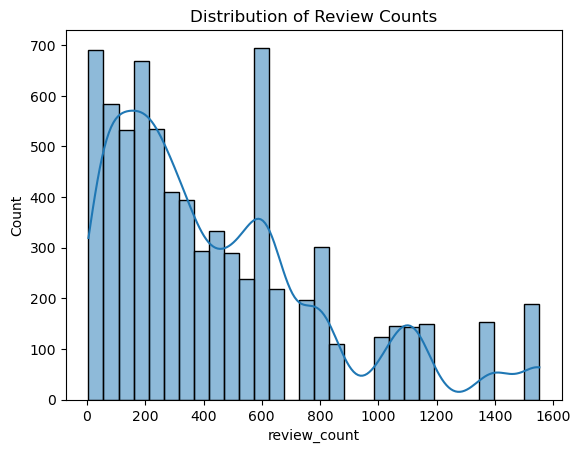

In [16]:
# Distribution of ratings
sns.histplot(df['business_star'], kde=True, bins=5)
plt.title('Distribution of Business Ratings')
plt.show()

sns.histplot(df['review_star'], kde=True, bins=5)
plt.title('Distribution of Review Ratings')
plt.show()

# Distribution of review counts
sns.histplot(df['review_count'], kde=True, bins=30)
plt.title('Distribution of Review Counts')
plt.show()

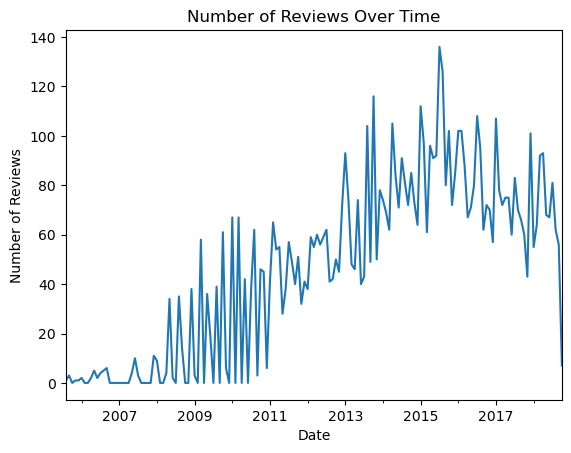

In [17]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot number of reviews over time
df.resample('M', on='date')['review_id'].count().plot()
plt.title('Number of Reviews Over Time')
plt.ylabel('Number of Reviews')
plt.xlabel('Date')
plt.show()

In [18]:
# Top 10 most popular categories
df['categories'] = df['categories'].str.split(', ')
exploded_df = df.explode('categories')
category_counts = exploded_df['categories'].value_counts()

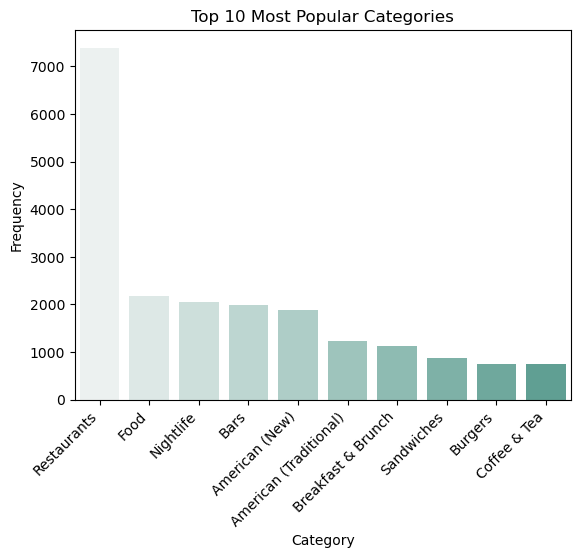

In [19]:
top_categories = category_counts.head(10)

sns.barplot(x=top_categories.index, y=top_categories.values, palette='light:#5A9')  # Use Seaborn to plot bars
plt.xlabel('Category')  # Set the x-label
plt.ylabel('Frequency')  # Set the y-label
plt.title('Top 10 Most Popular Categories')  # Set the title
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.show()

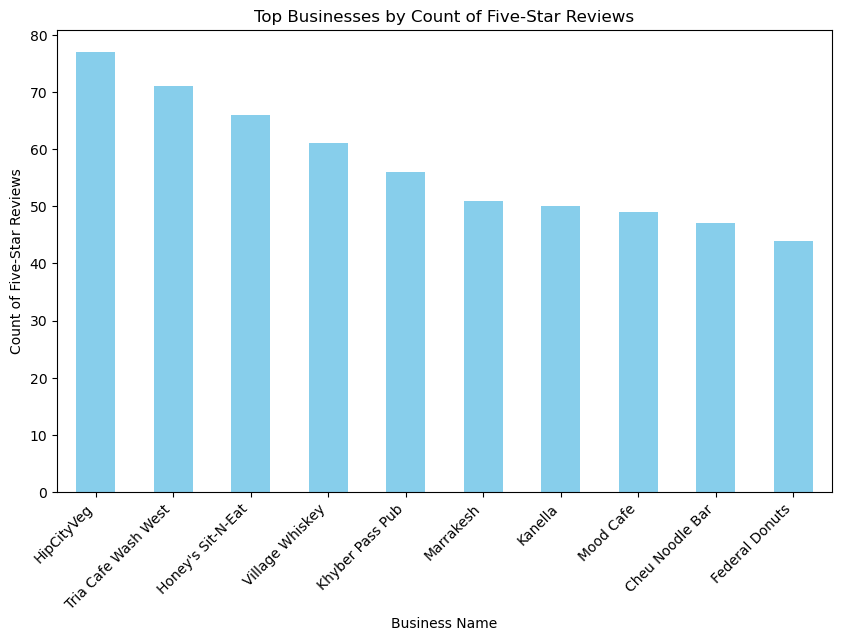

In [20]:
# Business with most five star review stars
five_star_reviews = df[df['review_star'] == 5]
five_star_counts = five_star_reviews.groupby('name').size()
sorted_counts = five_star_counts.sort_values(ascending=False)
top_business = sorted_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_business.plot(kind='bar', color='skyblue')
plt.xlabel('Business Name')
plt.ylabel('Count of Five-Star Reviews')
plt.title('Top Businesses by Count of Five-Star Reviews')
plt.xticks(rotation=45, ha='right')  # Improve label readability
plt.show()

### Data Preprocessing

In [21]:
# Clean review text

In [22]:
def clean_text(text):
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)    
    return text
df['text'] = df['text'].apply(clean_text)  

In [25]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,business_star,review_count,...,categories,hours,review_id,user_id,review_star,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4.0,0,0,1,nice little chinese bakery heart philadelphia ...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4.0,3,1,2,bakery usually chinatown decent variety buns p...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5.0,0,0,0,delightful find chinatown ! clean kind service...,2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5.0,5,0,5,ordered graduation cake niece came absolutely ...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"[Restaurants, Food, Bubble Tea, Coffee & Tea, ...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4.0,2,1,1,hk - style milk tea : four stars + + not quite...,2013-10-25 02:31:35


## user-based filtering

### Cosine Similarity

In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Splitting the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create user-item matrix for the training data
train_user_item_matrix = train_df.pivot_table(index='user_id', columns='business_id', values='review_star').fillna(0)

# Compute similarity matrix for users in the training set
user_similarity = cosine_similarity(train_user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Predict rating function as defined previously
def predict_rating(user_id, business_id):
    if business_id in train_user_item_matrix.columns and user_id in user_similarity_df.index:
        similar_users = user_similarity_df[user_id].sort_values(ascending=False)
        similar_users = similar_users.drop(user_id)  # Remove self-similarity
        top_similar_users = similar_users.head(10)  # Consider top 10 similar users
        
        # Get ratings of these users for the business
        similar_users_ratings = train_user_item_matrix.loc[top_similar_users.index, business_id]
        # Calculate predicted rating as weighted average of ratings from similar users
        predicted_rating = np.dot(top_similar_users, similar_users_ratings) / top_similar_users.sum()
    else:
        predicted_rating = np.nan  # Return NaN if we cannot find the business or user in the training set
    
    return predicted_rating

# Function to recommend businesses by name
def recommend_businesses(user_id, num_recommendations=5):
    if user_id not in user_similarity_df.index:
        return "User not found in the training set"
    
    unrated_businesses = train_user_item_matrix.columns[~train_user_item_matrix.loc[user_id].index.isin(train_df[train_df['user_id'] == user_id]['business_id'])]
    predictions = {}
    
    for business_id in unrated_businesses:
        predicted_rating = predict_rating(user_id, business_id)
        if not np.isnan(predicted_rating):
            predictions[business_id] = predicted_rating
    
    sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)
    top_business_ids = [business_id for business_id, rating in sorted_predictions[:num_recommendations]]
    top_business_names = df[df['business_id'].isin(top_business_ids)]['name'].unique().tolist()
    
    return top_business_names

# Evaluate the model with RMSE
actual_ratings = []
predicted_ratings = []

for index, row in test_df.iterrows():
    actual_rating = row['review_star']
    predicted_rating = predict_rating(row['user_id'], row['business_id'])
    
    if not np.isnan(predicted_rating):
        actual_ratings.append(actual_rating)
        predicted_ratings.append(predicted_rating)

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f"RMSE: {rmse}")

# Example usage
user_id = 'tCXElwhzekJEH6QJe3xs7Q' 
recommendations = recommend_businesses(user_id)
print(f"Recommendations for user {user_id}: {recommendations}")

RMSE: 3.7991366409719123
Recommendations for user tCXElwhzekJEH6QJe3xs7Q: ["Zorba's Taverna", 'Sky Cafe', 'Federal Donuts', 'Marathon', 'Spring Chinese Restaurant']


### Adjusted Cosine Similarity

Adjusted Cosine Similarity normalizes the ratings by subtracting the user's average rating before computing cosine similarity, which helps in dealing with varying rating scales among users. Significance Weighting penalizes similarities based on a threshold of co-rated items, reducing the influence of similarities calculated with few co-ratings.

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create user-item matrix for the training data
train_user_item_matrix = train_df.pivot_table(index='user_id', columns='business_id', values='review_star').fillna(0)

# Calculate the mean rating for each user
user_mean_ratings = train_user_item_matrix.mean(axis=1)

# Normalize the ratings by subtracting the user mean rating
normalized_ratings = train_user_item_matrix.sub(user_mean_ratings, axis=0)

# Adjusted Cosine Similarity
def adjusted_cosine_similarity(matrix):
    similarity_matrix = np.dot(matrix, matrix.T) / (np.sqrt(np.dot(matrix**2, matrix.T)) * np.sqrt(np.dot(matrix, matrix.T**2)))
    similarity_matrix = pd.DataFrame(similarity_matrix, index=matrix.index, columns=matrix.index).fillna(0)
    return similarity_matrix

user_similarity = adjusted_cosine_similarity(normalized_ratings)

# Significance Weighting - Apply a threshold for the number of co-rated items
def apply_significance_weighting(similarity_matrix, ratings_matrix, threshold=50):
    co_rated = np.dot((ratings_matrix > 0).astype(int), (ratings_matrix > 0).astype(int).T)
    significance_mask = co_rated >= threshold
    adjusted_similarity = similarity_matrix * significance_mask
    return adjusted_similarity

user_similarity = apply_significance_weighting(user_similarity, normalized_ratings)

# Predict rating function with adjustments
def predict_rating(user_id, business_id):
    if business_id in train_user_item_matrix.columns and user_id in user_similarity.index:
        similar_users = user_similarity[user_id].sort_values(ascending=False)
        similar_users = similar_users.drop(user_id)  # Remove self-similarity
        top_similar_users = similar_users.head(10)  # Consider top 10 similar users
        
        # Get ratings of these users for the business
        similar_users_ratings = normalized_ratings.loc[top_similar_users.index, business_id]
        # Calculate predicted rating as weighted average of normalized ratings from similar users
        predicted_rating = np.dot(top_similar_users, similar_users_ratings) / top_similar_users.sum() if top_similar_users.sum() != 0 else 0
        # Re-adjust the predicted rating by adding the mean rating of the target user
        predicted_rating += user_mean_ratings[user_id]
    else:
        predicted_rating = np.nan  # Return NaN if we cannot find the business or user in the training set
    
    return predicted_rating

# Evaluate the model with RMSE
actual_ratings = []
predicted_ratings = []

for index, row in test_df.iterrows():
    actual_rating = row['review_star']
    predicted_rating = predict_rating(row['user_id'], row['business_id'])
    
    if not np.isnan(predicted_rating):
        actual_ratings.append(actual_rating)
        predicted_ratings.append(predicted_rating)

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f"RMSE: {rmse}")

# Example usage
user_id = 'tCXElwhzekJEH6QJe3xs7Q' 
recommendations = recommend_businesses(user_id)
print(f"Recommendations for user {user_id}: {recommendations}")

RMSE: 3.876181963362989
Recommendations for user tCXElwhzekJEH6QJe3xs7Q: ['La Creperie Cafe', "Zorba's Taverna", 'Federal Donuts', 'Marathon', 'Spring Chinese Restaurant']


### Dynamic Neighbor Selection on Cosine Similarity

In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Splitting the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Create user-item matrix for the training data
train_user_item_matrix = train_df.pivot_table(index='user_id', columns='business_id', values='review_star').fillna(0)

# Compute similarity matrix for users in the training set
user_similarity = cosine_similarity(train_user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Adjust predict_rating function to use dynamic neighbor selection based on a similarity threshold
def predict_rating(user_id, business_id, similarity_threshold=0.5):
    if business_id in train_user_item_matrix.columns and user_id in user_similarity_df.index:
        # Get similarity scores for all users with respect to the given user
        similar_users = user_similarity_df[user_id]
        
        # Apply a threshold to select only users that are above a certain similarity score
        similar_users = similar_users[similar_users > similarity_threshold].sort_values(ascending=False)
        
        # If no users meet the threshold, return NaN
        if similar_users.empty:
            return np.nan
        
        similar_users = similar_users.drop(user_id, errors='ignore')  # Remove self-similarity if exists
        
        # Get ratings of these users for the business
        similar_users_ratings = train_user_item_matrix.loc[similar_users.index, business_id]
        
        # Calculate predicted rating as weighted average of ratings from similar users
        if similar_users.sum() != 0:
            predicted_rating = np.dot(similar_users, similar_users_ratings) / similar_users.sum()
        else:
            predicted_rating = np.nan  # Return NaN if the sum of similarities is zero
    else:
        predicted_rating = np.nan  # Return NaN if we cannot find the business or user in the training set
    
    return predicted_rating

# Evaluate the model with RMSE
actual_ratings = []
predicted_ratings = []

for index, row in test_df.iterrows():
    actual_rating = row['review_star']
    predicted_rating = predict_rating(row['user_id'], row['business_id'])
    
    if not np.isnan(predicted_rating):
        actual_ratings.append(actual_rating)
        predicted_ratings.append(predicted_rating)

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
print(f"RMSE: {rmse}")

# Example usage (assuming the presence of a 'df' DataFrame with user IDs, business IDs, and ratings)
user_id = 'tCXElwhzekJEH6QJe3xs7Q'
recommendations = recommend_businesses(user_id)
print(f"Recommendations for user {user_id}: {recommendations}")

RMSE: 3.805438304578045
Recommendations for user tCXElwhzekJEH6QJe3xs7Q: ["Zorba's Taverna", 'Sky Cafe', 'Federal Donuts', 'Marathon', 'Spring Chinese Restaurant']
